<a href="https://colab.research.google.com/github/vinnyhbr/Atoba/blob/main/Atob%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

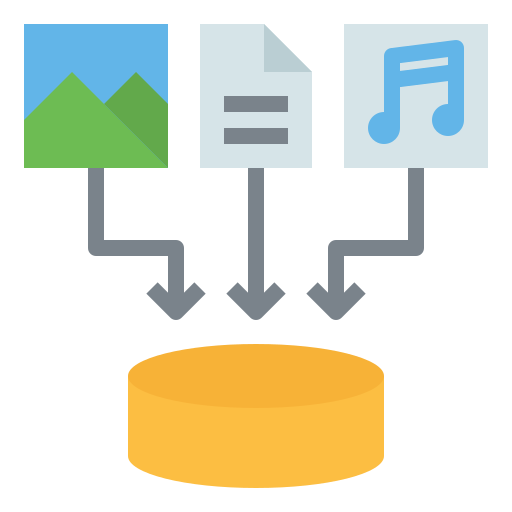

#Desenvolvimento do Conjunto de Dados
- Captura de Imagens de Sat√©lite:

**1.Sensores de Sat√©lite:** Imagens s√£o capturadas por sensores a bordo dos sat√©lites, que detectam reflex√µes de luz e outras radia√ß√µes eletromagn√©ticas da superf√≠cie terrestre e marinha.

**2.Resolu√ß√£o das Imagens:** Dependendo do sat√©lite, a resolu√ß√£o pode variar, mas geralmente √© de alta defini√ß√£o para capturar detalhes finos.

Divis√£o das Imagens:

**3.Dimensionamento de Patches:** Imagens grandes s√£o divididas em patches menores (exemplo: 100x100 pixels) para facilitar o processamento e a an√°lise.

C√°lculo de Patches:

#  Divis√£o das Imagens
**C√°lculo Realizado:**
Dimensionamento de Patches:
As imagens de sat√©lite s√£o divididas em menores chamadas patches .

Suponha que uma imagem de sat√©lite tenha uma resolu√ß√£o de 4000 x 4000 pixels.

patches de (4000/100 = 40).Se quisermos dividir essa imagem em patches de 100 x 100 pixels, a imagem ser√° dividida em 40 x 40 patches (4000/100 = 40).

In [ ]:
# Essa opera√ß√£o cria uma s√©rie de pequenos quadrados, permitindo que cada patch seja aplicado separadamente.
image_height = 4000
image_width = 4000
patch_size = 100

num_patches_vertical = image_height // patch_size
num_patches_horizontal = image_width // patch_size
# Isso resultar√° em patches 40x40 para uma imagem de 4000x4000 pixels.
# Dividir imagens de sat√©lite em patches menores ajuda a tornar a an√°lise mais precisa e gerenci√°vel.
# Fazendo isso, cada patch se torna um vetor de dados que pode ser analisado individualmente para detectar
# padr√µes e anomalias. Em resumo, trabalhar com patches facilita a detec√ß√£o de
# pequenos detalhes e torna a an√°lise de grandes imagens mais eficiente.

# Processamento de Imagens
**C√°lculo Realizado:**
- Corre√ß√£o Radiom√©trica:

1. Ajusta os valores de brilho e contraste da imagem.

2. F√≥rmula:Imagem_corrigida = (Imagem_original - Min) / (Max - Min)

In [ ]:
def corregir_radiometrica(imagem):
    min_val = imagem.min()
    max_val = imagem.max()
    imagem_corrigida = (imagem - min_val) / (max_val - min_val)
    return imagem_corrigida

- Corre√ß√£o Geom√©trica:

Alinhamento das Imagens: Usando transforma√ß√µes geom√©tricas para alinhar corretamente a imagem √† superf√≠cie terrestre. Usando transforma√ß√µes geom√©tricas para alinhar corretamente a imagem √† superf√≠cie terrestre.



In [ ]:
from skimage.transform import warp
def corregir_geometrica(imagem, coordenadas):
    imagem_corrigida = warp(imagem, coordenadas)
    return imagem_corrigida


-  Realidade das Imagens:

1. Melhore a qualidade da imagem para destacar caracter√≠sticas importantes.

2. Voc√™ pode usar filtros como o filtro de Sobel para detec√ß√£o de bordas.

Filtro de Sobel para Detec√ß√£o de Bordas: Real√ßa as bordas e caracter√≠sticas importantes. Real√ßa as bordas e caracter√≠sticas importantes.

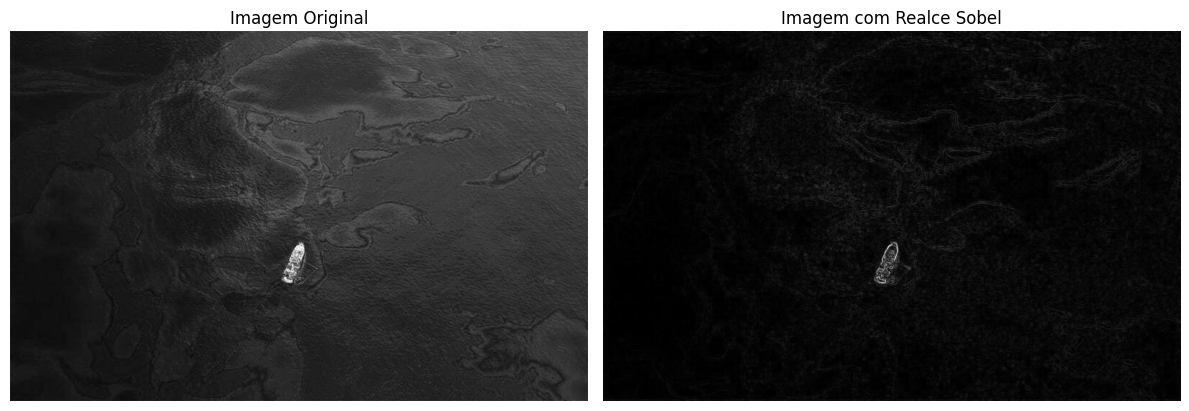

In [ ]:
from skimage import io, color
from skimage.filters import sobel
import matplotlib.pyplot as plt

# Carregar e Processar a Imagem
imagem = io.imread('/content/Manchas-de-oleo-.jpg')
imagem_cinza = color.rgb2gray(imagem)
imagem_realce = sobel(imagem_cinza)

# Exibir as Imagens
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(imagem_cinza, cmap=plt.cm.gray)
ax[0].set_title('Imagem Original')

ax[1].imshow(imagem_realce, cmap=plt.cm.gray)
ax[1].set_title('Imagem com Realce Sobel')

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


#3. Extra√ß√£o de Recursos
**C√°lculo Realizado:**
- Caracter√≠sticas de Textura:

1. Caracter√≠sticas como contraste, brilho, energia e homogeneidade podem ser extra√≠das.

2. Por exemplo, utilizando a matriz de coocorr√™ncia de n√≠veis de cinza (GLCM):

Matriz de Coocorr√™ncia de N√≠veis de Cinza (GLCM): e homogeneidade. Calcula caracter√≠sticas como contraste, brilho, energia e homogeneidade.

In [ ]:
from skimage.feature import graycomatrix, graycoprops

def extrair_caracteristicas_textura(imagem):
    glcm = greycomatrix(imagem, distances=[1], angles=[0], symmetric=True, normed=True)
    contraste = greycoprops(glcm, 'contrast')[0, 0]
    correlacao = greycoprops(glcm, 'correlation')[0, 0]
    energia = greycoprops(glcm, 'energy')[0, 0]
    homogeneidade = greycoprops(glcm, 'homogeneity')[0, 0]
    return [contraste, correlacao, energia, homogeneidade]

- Caracter√≠sticas de Cor:

1. M√©dias e desvios padr√£o das intensidades das cores (por exemplo, em RGB ou outros espa√ßos de cores).

In [ ]:
def extrair_caracteristicas_cor(imagem):
    media = np.mean(imagem, axis=(0, 1))
    desvio_padrao = np.std(imagem, axis=(0, 1))
    return np.concatenate([media, desvio_padrao])

# **Esses** c√°lculos transformam a imagem em vetores de recursos que descrevem quantitativamente o conte√∫do visual, permitindo a constru√ß√£o de modelos de aprendizado de m√°quina para classifica√ß√£o.

# **Processo Completo**
#As imagens de sat√©lite s√£o capturadas, divididas em manchas menores, e processadas para corre√ß√£o de brilho, contraste e geometria. T√©cnicas de realce, como o filtro Sobel, s√£o aplicadas para destacar caracter√≠sticas importantes. Finalmente, recursos de textura e cor s√£o extra√≠dos para criar vetores que representam quantitativamente o conte√∫do de cada patch, permitindo a classifica√ß√£o de vazamentos de √≥leo.

================================================================================

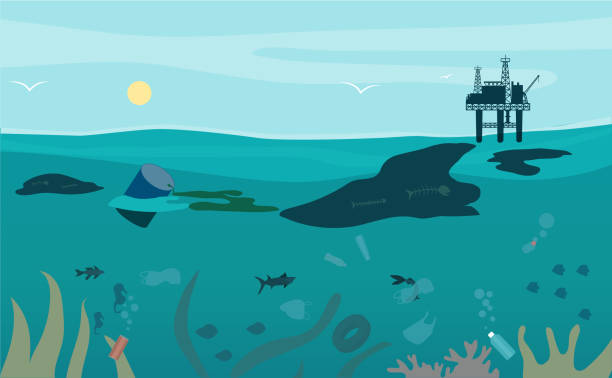

# üõ¢üåäOil Spill Classification

# **Aqui vamos treinar e analisar os resultados de 4 modelos**

# Importa√ß√£o de Bibliotecas

In [ ]:
9# Pandas: manipula√ß√£o de dados.
# Scikit-learn: Modelagem treinamento e avalia√ß√£o de modelos
# Matplotlib e Numpy: Visualiza√ß√£o de dados e opera√ß√µes num√©ricas.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Carregar Dados

In [ ]:
# Carregar os dados salvos no drive.
# Carregamento do CSV: Os dados s√£o carregados em um DataFrame do Pandas.
data = pd.read_csv('/content/oil_spill.csv')
data.head()

f_1    f_2      f_3     f_4  f_5       f_6    f_7   f_8      f_9  f_10  \
0    1   2558  1506.09  456.63   90   6395000  40.88  7.89  29780.0  0.19   
1    2  22325    79.11  841.03  180  55812500  51.11  1.21  61900.0  0.02   
2    3    115  1449.85  608.43   88    287500  40.42  7.34   3340.0  0.18   
3    4   1201  1562.53  295.65   66   3002500  42.40  7.97  18030.0  0.19   
4    5    312   950.27  440.86   37    780000  41.43  7.03   3350.0  0.17   

   ...     f_41      f_42     f_43     f_44   f_45  f_46      f_47   f_48  \
0  ...  2850.00   1000.00   763.16   135.46   3.73     0  33243.19  65.74   
1  ...  5750.00  11500.00  9593.48  1648.80   0.60     0  51572.04  65.73   
2  ...  1400.00    250.00   150.00    45.13   9.33     1  31692.84  65.81   
3  ...  6041.52    761.58   453.21   144.97  13.33     1  37696.21  65.67   
4  ...  1320.04    710.63   512.54   109.16   2.58     0  29038.17  65.66   

   f_49  target  
0  7.95       1  
1  6.26       0  
2  7.84       1  
3  8.07       1  
4  7.35       0  

[5 rows x 50 columns]

In [ ]:
# Mostrar as dimens√µes do DataFrame
print(f'Dimens√µes do DataFrame: {data.shape}')

# Pegar os valores separados
num_rows, num_columns = data.shape

print(f'N√∫mero de linhas: {num_rows}')
print(f'N√∫mero de colunas: {num_columns}')

Dimens√µes do DataFrame: (937, 50)
N√∫mero de linhas: 937
N√∫mero de colunas: 50


# Separar as Vari√°veis Independentes (X) e Dependentes (y)

In [ ]:
# Vari√°veis ‚Äã‚ÄãIndependentes (X): Todas as colunas, exceto a √∫ltima.
# A √∫ltima coluna, que cont√©m o alvo 'target'.
X = data.iloc[:, :-1]
y = data['target']


# Normalizar e Padronizar os Dados para Garantir Consist√™ncia

In [ ]:
# StandardScaler: Normaliza as vari√°veis ‚Äã‚Äãindependentes para que todas estejam na mesma escala (m√©dia 0 e desvio padr√£o 1).
# Criar uma inst√¢ncia de StandardScaler
scaler = StandardScaler()

# Ajustar e transformar os dados
# Ajustar e transformar os dados
X_normalized = scaler.fit_transform(X)

# Converter de volta para um DataFrame com os nomes das colunas originais
X = pd.DataFrame(data=X_normalized, columns=X.columns)

# Verifique os dados normalizados
X.head()

f_1        f_2       f_3       f_4       f_5        f_6       f_7  \
0 -1.240922   1.152390  1.346434 -0.793007  0.129657   1.469091 -0.185871   
1 -1.225524  11.389546 -1.033273 -0.057342  2.114766  14.374844  0.618905   
2 -1.210126  -0.112818  1.252645 -0.502492  0.085544  -0.125929 -0.222058   
3 -1.194727   0.449611  1.440556 -1.101091 -0.399705   0.583114 -0.066295   
4 -1.179329  -0.010794  0.419520 -0.823188 -1.039352   0.002691 -0.142604   

        f_8       f_9      f_10  ...      f_40      f_41       f_42  \
0 -0.345107  3.165389 -0.343460  ...  0.611105  1.913877   0.800597   
1 -2.207407  7.100184 -2.226754  ...  0.611105  4.810555  15.485710   
2 -0.498440 -0.073589 -0.454242  ...  0.611105  0.465538  -0.248340   
3 -0.322804  1.725979 -0.343460  ...  0.611105  5.101741   0.467147   
4 -0.584864 -0.072364 -0.565024  ...  0.611105  0.385669   0.395889   

        f_43       f_44      f_45      f_46      f_47      f_48      f_49  
0   0.950757   0.216514 -0.255448 -0.383248  3.686767  0.388730 -0.058377  
1  17.486286  11.381341 -0.878152 -0.383248  6.362181  0.387769 -0.639664  
2  -0.197438  -0.449905  0.858654  2.609278  3.460466  0.395456 -0.096212  
3   0.370349   0.286675  1.654442  2.609278  4.336762  0.382004 -0.017102  
4   0.481449   0.022483 -0.484237 -0.383248  3.072971  0.381043 -0.264751  

[5 rows x 49 columns]

## N√∫mero de imagens com manchas de √≥leo no conjunto de dados

In [ ]:
# Contar quantas imagens t√™m manchas de √≥leo
count_oil_spill = data['target'].value_counts()[1]  # Supondo que 1 indica vazamento de √≥leo

print(f'N√∫mero de imagens com manchas de √≥leo: {count_oil_spill}')

# Contar quantas imagens n√£o t√™m manchas de √≥leo
count_no_oil_spill = data['target'].value_counts()[0]  # Supondo que 0 indica aus√™ncia de vazamento de √≥leo

print(f'N√∫mero de imagens sem manchas de √≥leo: {count_no_oil_spill}')

N√∫mero de imagens com manchas de √≥leo: 41
N√∫mero de imagens sem manchas de √≥leo: 896


# Apresenta esse resultado em um grafico

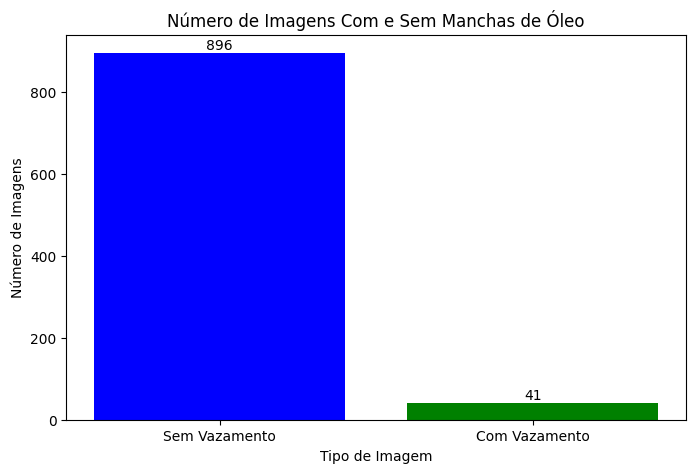

In [ ]:
# Contar o n√∫mero de imagens com e sem manchas de √≥leo
count_oil_spill = data['target'].value_counts()

# Criar o gr√°fico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(['Sem Vazamento', 'Com Vazamento'], count_oil_spill, color=['blue', 'green'])

# Adicionar os n√∫meros sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.title('N√∫mero de Imagens Com e Sem Manchas de √ìleo')
plt.xlabel('Tipo de Imagem')
plt.ylabel('N√∫mero de Imagens')
plt.show()

# Divis√£o em Conjunto de Treino e Teste

In [ ]:
# Treino/Teste: Os dados dados s√£o divididos em 80% para treino e 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defini√ß√£o dos Modelos


In [ ]:
# √Årvore de Decis√£o: Algoritmo simples e interpretado interpret√°vel.
# Floresta Aleat√≥ria: Conjunto de √°rvores de decis√£o para melhorar resultados e reduzir overfitting.
# Regress√£o Log√≠stica: Modelo linear para classifica√ß√£o.
# Rede Neural (MLP): Modelo mais complexo com m√∫ltiplas camadas.
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model_lr = LogisticRegression(solver='saga', max_iter=5000)
model_nn = MLPClassifier(random_state=42, max_iter=5000)
models = [("√Årvore de Decis√£o", model_tree), ("Rede Neural", model_nn), ("Regress√£o Logistica", model_lr)]

# Treinamento e Avalia√ß√£o dos Modelos

In [ ]:
# model.fit treinar o modelo com os dados de treino.
# Predi√ß√£o: faz varia√ß√£o no conjunto de teste. model.predict
# Avalia√ß√£o: e calcula m√©tricas de desempenho. classification_report accuracy_score

results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'precision': [report['0']['precision'], report['1']['precision'], report['macro avg']['precision'], report['weighted avg']['precision']],
        'recall': [report['0']['recall'], report['1']['recall'], report['macro avg']['recall'], report['weighted avg']['recall']],
        'f1_score': [report['0']['f1-score'], report['1']['f1-score'], report['macro avg']['f1-score'], report['weighted avg']['f1-score']],
        'accuracy': accuracy
    }
    print(f'Relat√≥rio de classifica√ß√£o do {name}:')
    print(classification_report(y_test, y_pred, zero_division=1))
    print('\n')

Relat√≥rio de classifica√ß√£o do √Årvore de Decis√£o:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.62      0.83      0.71         6

    accuracy                           0.98       188
   macro avg       0.81      0.91      0.85       188
weighted avg       0.98      0.98      0.98       188



Relat√≥rio de classifica√ß√£o do Rede Neural:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.45      0.83      0.59         6

    accuracy                           0.96       188
   macro avg       0.72      0.90      0.78       188
weighted avg       0.98      0.96      0.97       188



Relat√≥rio de classifica√ß√£o do Regress√£o Logistica:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       182
           1       0.50      0.50      0.50         6

    accuracy           

# Acur√°cia nos Dados de Treino

In [ ]:
# Avalia√ß√£o no Treino: Calcula acur√°cia nos dados de treino para verificar mais
for name, model in models:
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    results[name]['train_accuracy'] = train_accuracy
    print(f'--- {name} ---')
    print(f'Test Accuracy: {accuracy:.2f}')
    print(f'Train Accuracy: {train_accuracy:.2f}')
    print('')

--- √Årvore de Decis√£o ---
Test Accuracy: 0.97
Train Accuracy: 0.98

--- Rede Neural ---
Test Accuracy: 0.97
Train Accuracy: 1.00

--- Regress√£o Logistica ---
Test Accuracy: 0.97
Train Accuracy: 0.97



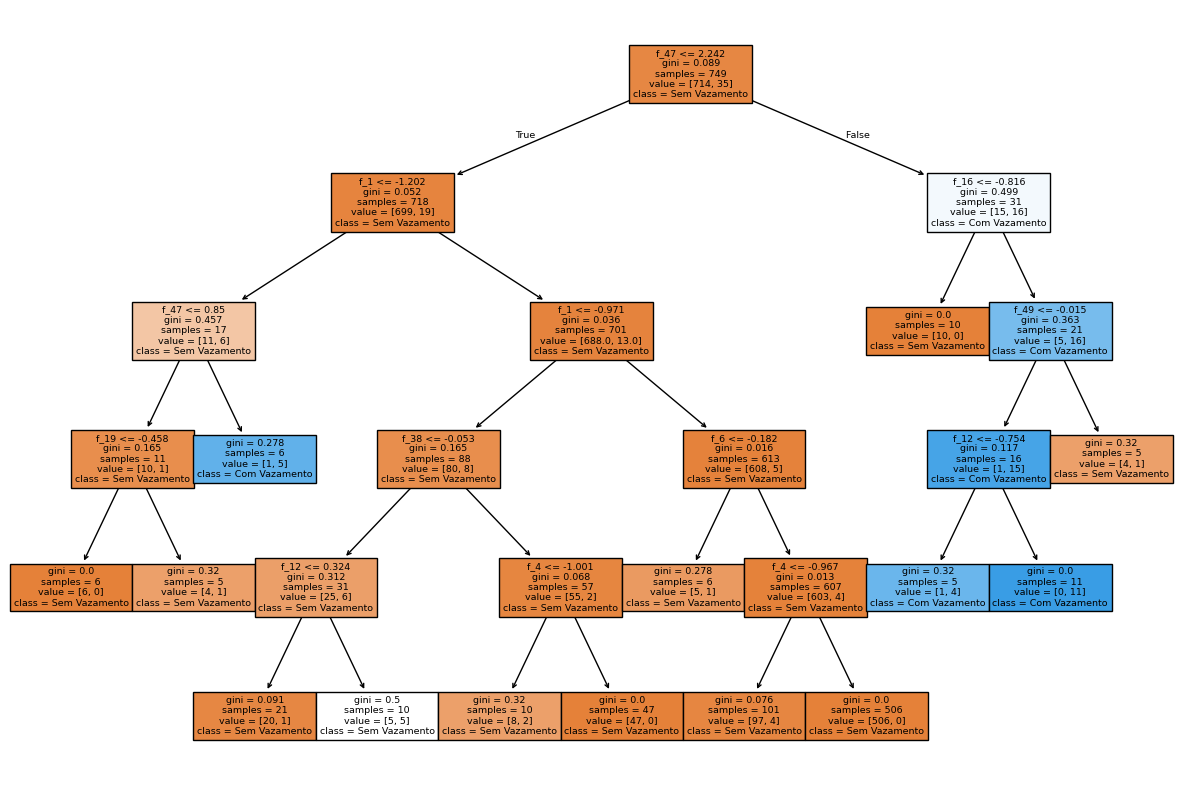

In [ ]:
# Visualizando a arvore
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(model_tree, feature_names=data.columns[:-1], class_names=['Sem Vazamento', 'Com Vazamento'], filled=True, ax=ax)
plt.show()

# Analise sobre o grafico
**A imagem mostra uma √°rvore de decis√£o usada para classificar dados em duas classes: "Sem Vazamento" e "Com Vazamento". A √°rvore de decis√£o √© composta por v√°rios n√≥s, cada um representando uma decis√£o baseada em uma caracter√≠stica (como f_1, f_47, f_16, etc.) e um valor de limites. Aqui est√£o alguns pontos importantes sobre a √°rvore:**

*Caracter√≠sticas Importantes:*
- f_47 : √â o primeiro n√≥ de decis√£o, dividindo os dados em dois ramos principais com base no valor 2.242. Isso indica que a caracter√≠stica f_47 √© mais significativa para a decis√£o inicial .

- f_1 : Aparece em v√°rios n√≥s, abaixo que √© uma caracter√≠stica significativa para a classifica√ß√£o.

- f_16, f_43, f_38 : Outras caracter√≠sticas que aparecem em diferentes n√≠veis da √°rvore, contribuindo para a classifica√ß√£o final.

# Fun√ß√£o para Criar Gr√°ficos

In [ ]:
# Plot_metrics: Fun√ß√£o para criar gr√°ficos das medidas de precis√£o, recall e f1-score.
def plot_metrics(metrics, title, ylabel):
    labels = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
    x = np.arange(len(labels))
    width = 0.2
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, (name, metric) in enumerate(metrics.items()):
        rects = ax.bar(x + i*width, metric, width, label=name)
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    ax.set_xlabel('Classes')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

# Cria√ß√£o dos Gr√°ficos

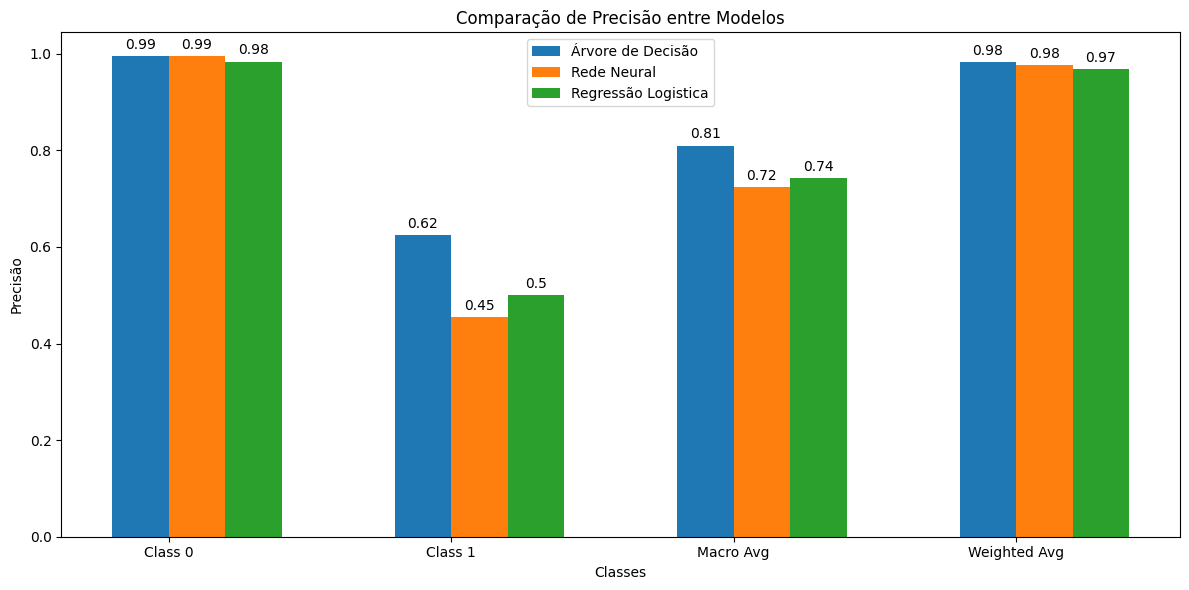

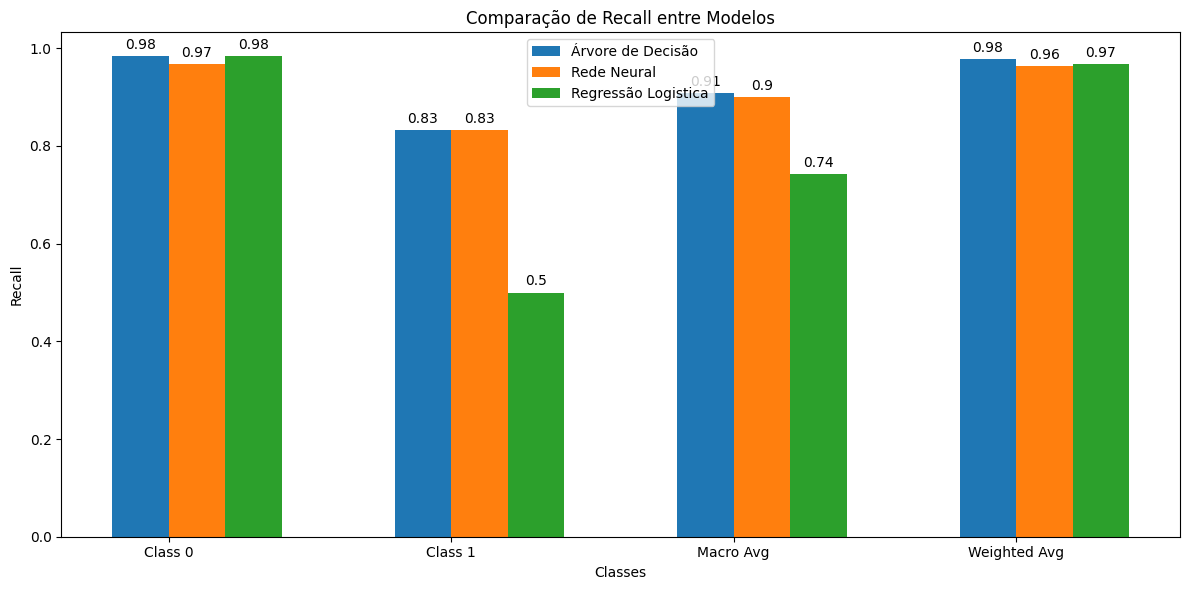

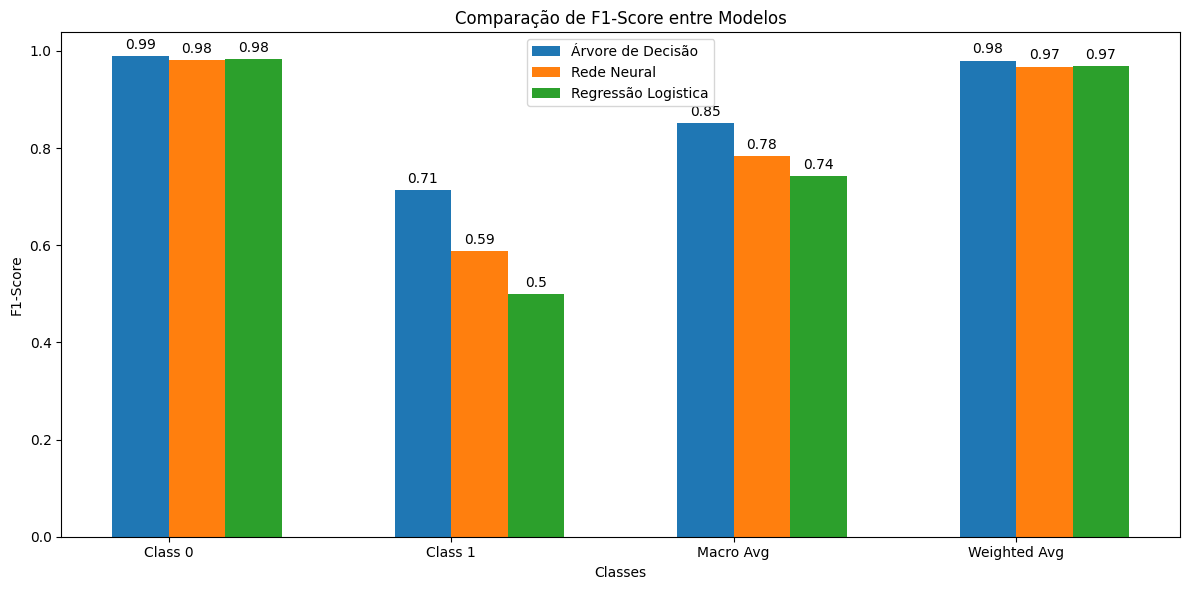

In [ ]:
# Gr√°ficos: Plota gr√°ficos comparando solu√ß√µes, recall e f1-score entre os modelos.
plot_metrics({name: result['precision'] for name, result in results.items()}, 'Compara√ß√£o de Precis√£o entre Modelos', 'Precis√£o')
plot_metrics({name: result['recall'] for name, result in results.items()}, 'Compara√ß√£o de Recall entre Modelos', 'Recall')
plot_metrics({name: result['f1_score'] for name, result in results.items()}, 'Compara√ß√£o de F1-Score entre Modelos', 'F1-Score')

# Gr√°fico de Acur√°cia

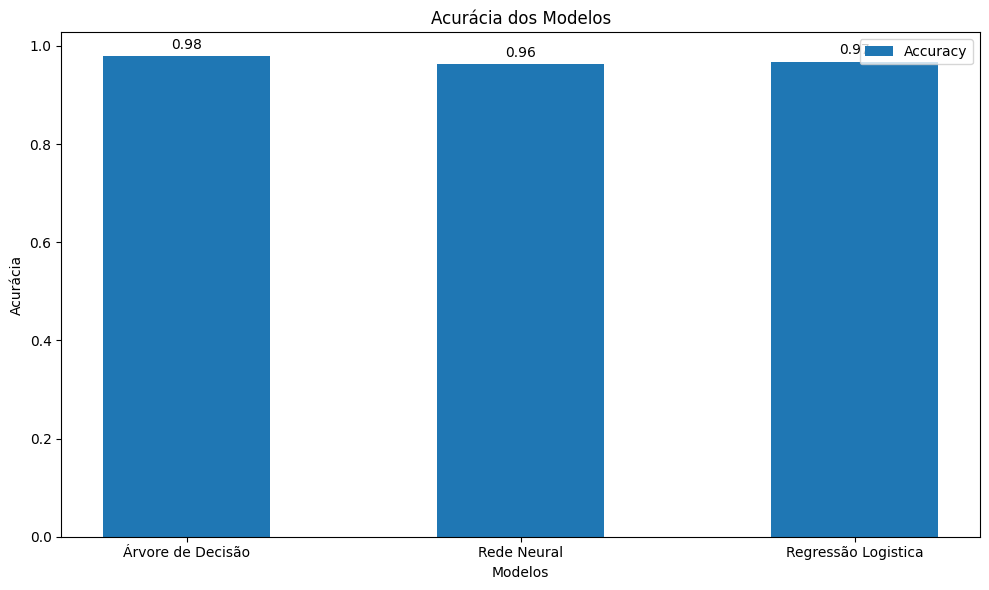

In [ ]:
# Gr√°fico de Acur√°cia: Compara a acur√°cia de diferentes modelos.
accuracy = [result['accuracy'] for result in results.values()]
fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(results.keys(), accuracy, width=0.5, label='Accuracy')
ax.set_xlabel('Modelos')
ax.set_ylabel('Acur√°cia')
ax.set_title('Acur√°cia dos Modelos')
ax.legend()
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
fig.tight_layout()
plt.show()

# Gr√°fico de Acur√°cia de Treino

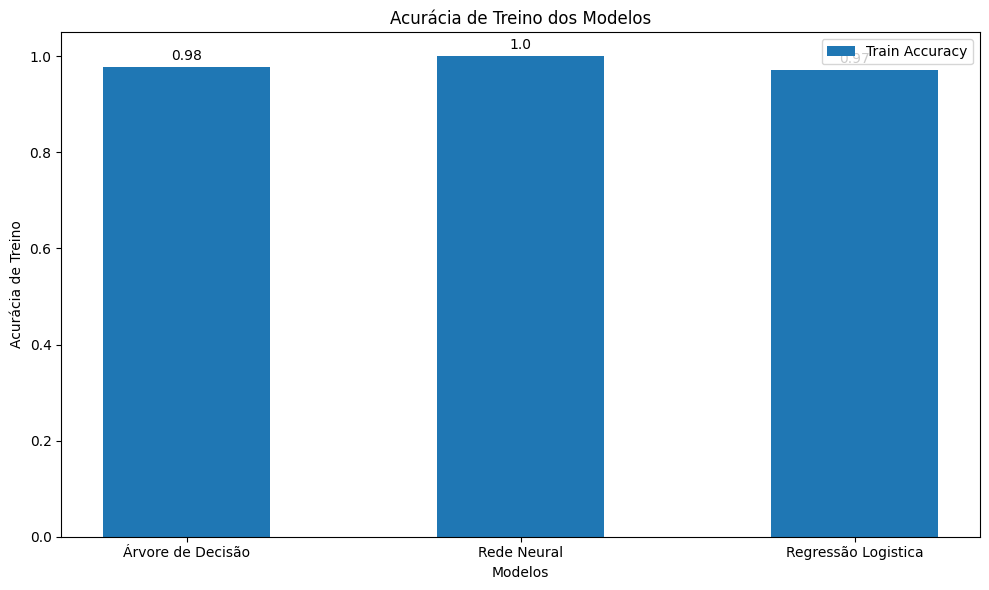

In [ ]:
train_accuracy = [result['train_accuracy'] for result in results.values()]
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.5
rects = ax.bar(results.keys(), train_accuracy, width, label='Train Accuracy')

ax.set_xlabel('Modelos')
ax.set_ylabel('Acur√°cia de Treino')
ax.set_title('Acur√°cia de Treino dos Modelos')
ax.legend()

for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()
plt.show()

# Conclus√£o:
 - √Årvore de Decis√£o : Tem o melhor desempenho geral, com alta precis√£o, recall e F1-Score tanto na classe 0 quanto na classe 1. A precis√£o para a classe 1 (0,62) e o recall (0,83) indica que √© confi√°vel para identificar corretamente os vazamentos de √≥leo, embora ainda tenha algum espa√ßo para melhorar os resultados.

 - Rede Neural : bom apresenta recall para a classe 1 (0.83), mas a precis√£o (0.45) √© baixa, indicando que o modelo tem muitos falsos positivos. A acur√°cia geral √© boa (0,96), mas o desempenho na classe 1 precisa ser melhorado.

- Regress√£o Log√≠stica Tem desempenho: Tem desempenho equilibrado, mas n√£o t√£o bom quanto a √Årvore de Decis√£o. A precis√£o e recall para a classe 1 s√£o medianas (0,50), diminuindo um desempenho moderado na detec√ß√£o de vazamentos de √≥leo.

**Melhor Modelo:**

***A √Årvore de Decis√£o se comporta melhor com base nesses resultados. Ela consegue equil√≠brio se comportou melhor com base nesses resultados. Ela consegue equilibrar bem as precis√£o e recall, resultando em um F1-Score robusto para ambas as classes. ***



---

